In [1]:
%matplotlib inline
import os
import pandas as pd
from fbprophet import Prophet
import json
from datetime import datetime, timedelta

In [2]:
def get_datetime_from_string(s, keep_utc=True):
    if keep_utc:
        return datetime.strptime(s + "00", '%Y-%m-%d %H:%M:%S%z')
    else:
        return datetime.strptime(s[:-3], '%Y-%m-%d %H:%M:%S')

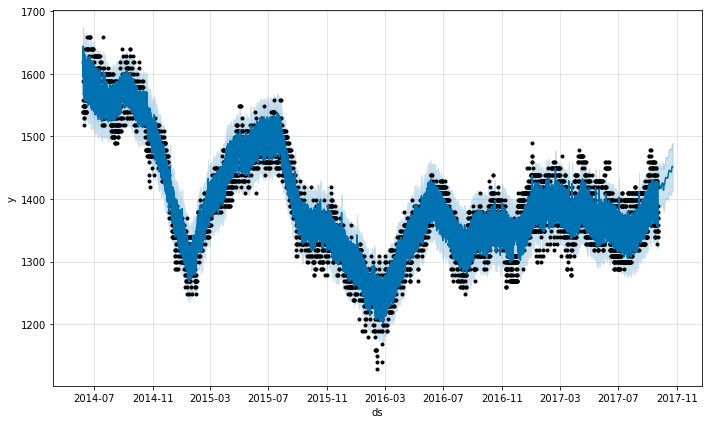

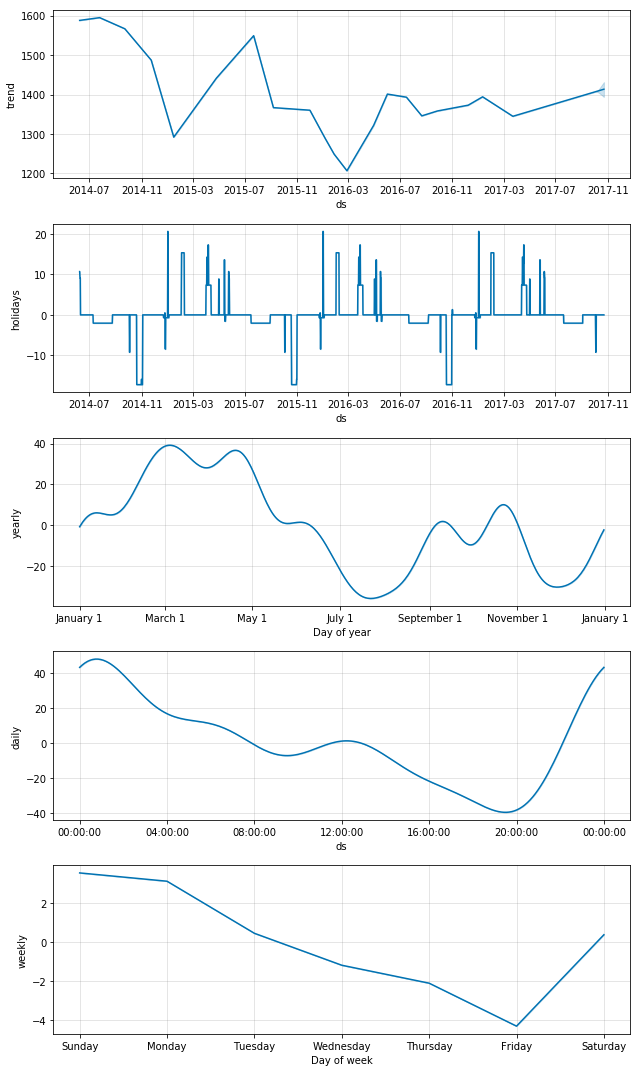

In [6]:
def predict_for_gas_station(gas_station_id, days=31):
    GAS_STATIONS_PATH = os.path.join('..', 'data', 'processed', 'Tankstellen_states.csv')
    GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')
    GAS_STATION_PATH = os.path.join(GAS_PRICE_PATH, "{}.csv".format(gas_station_id))
    
    gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=',')
    gas_station_state = gas_stations_df[gas_stations_df["id"] == gas_station_id]["State"].iloc[0]

    df_gas_station = pd.read_csv(GAS_STATION_PATH, names=['Timestamp', 'Price'], sep=';')
    df_gas_station.head()
    
    holidays_path = os.path.join('..', 'data', 'processed', "holidays_{}.csv".format(str(gas_station_state)))
    df_holidays = pd.read_csv(holidays_path)
    df_vacations = pd.read_csv(os.path.join('..', 'data', 'processed', "vacations_{}.csv".format(gas_station_state)))
    
    holidays_df = pd.concat((df_holidays, df_vacations))
    m = Prophet(holidays=holidays_df)
    df_fb = df_gas_station.copy()
    df_fb['y'] = df_fb['Price']
    df_fb['ds'] = df_fb['Timestamp'].apply(lambda x : get_datetime_from_string(str(x), keep_utc=False))
    df_fb.drop(['Timestamp', 'Price'], inplace=True, axis=1)
    m.fit(df_fb)
    future = m.make_future_dataframe(periods=days)
    forecast = m.predict(future)
    m.plot(forecast);
    m.plot_components(forecast);
    return m, future, forecast
    
m, future, forecast = predict_for_gas_station(1905)

In [7]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,1. Weihnachtstag,1. Weihnachtstag_lower,1. Weihnachtstag_upper,2. Weihnachtstag,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-06-08 09:50:01,1587.867740,1587.867740,1587.867740,1565.503469,1624.089339,0.0,0.0,0.0,0.0,...,-2.622523,-2.622523,-2.622523,3.569788,3.569788,3.569788,0.649612,0.649612,0.649612,1595.924858
1,2014-06-08 09:54:01,1587.868168,1587.868168,1587.868168,1565.205488,1628.194740,0.0,0.0,0.0,0.0,...,-2.485869,-2.485869,-2.485869,3.568855,3.568855,3.568855,0.648693,0.648693,0.648693,1596.061940
2,2014-06-09 00:02:01,1587.958908,1587.958908,1587.958908,1613.460826,1674.899064,0.0,0.0,0.0,0.0,...,47.167556,47.167556,47.167556,3.133736,3.133736,3.133736,0.440479,0.440479,0.440479,1644.195510
3,2014-06-09 01:34:02,1587.968754,1587.968754,1587.968754,1613.800107,1673.521740,0.0,0.0,0.0,0.0,...,47.240395,47.240395,47.240395,3.045518,3.045518,3.045518,0.416257,0.416257,0.416257,1644.278195
4,2014-06-09 04:18:01,1587.986301,1587.986301,1587.986301,1585.186702,1646.291564,0.0,0.0,0.0,0.0,...,18.414440,18.414440,18.414440,2.858775,2.858775,2.858775,0.372295,0.372295,0.372295,1615.469787
